# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 Samih warwar 324888155

 Merry Shalabi 324007202

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [164]:
url = "https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv"
df = pd.read_csv(url)

print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Depending of how most of the graphs look like gaussian bayes should work here</font>

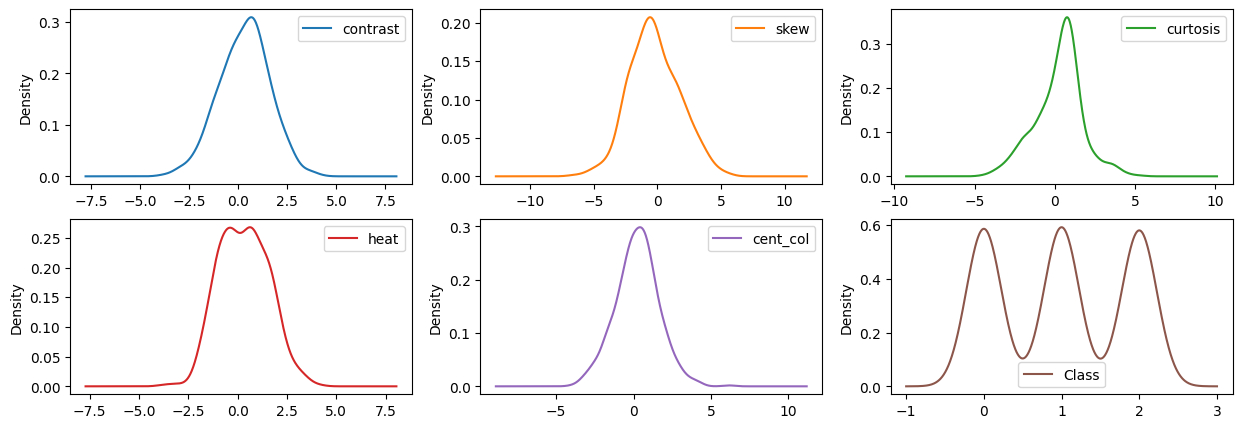

In [165]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [166]:
x= df.values[:,:-1]
y= df.values[:,-1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)



Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [167]:
def classify_point_gaussian_bayes(test_data):
    n, d = test_data.shape
    x = x_train
    y = y_train
    classes = np.unique(y)
    priors  = np.array([len(x[y==k])/len(y) for k in classes])

    # Calculate class conditional probabilities using Gaussian distribution
    means = []
    covariances = []
    for c in classes:
        X_c = x[y == c]
        mean = np.mean(X_c, axis=0)
        cov = np.cov(X_c.T) + 1e-6 * np.eye(d)  # add small number to ensure the matrix is positive
        means.append(mean)
        covariances.append(cov)

    means = np.array(means)
    covariances = np.array(covariances)

    # Calculate posterior probabilities
    posterior_probs = np.zeros((n, len(classes)))

    for i, (mean, cov) in enumerate(zip(means, covariances)):
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        norm_factor = np.log(1 / np.sqrt((2 * np.pi) ** d * cov_det))

        for j in range(n):
            diff = test_data[j] - mean
            exponent = -0.5 * np.dot(np.dot(diff, cov_inv), diff.T)
            posterior_probs[j, i] = norm_factor + exponent + np.log(priors[i])

    # Get the class with the highest posterior probability
    predicted_classes = classes[np.argmax(posterior_probs, axis=1)]

    return predicted_classes

def classify_point_gaussian_naive_bayes(test_data):
    n, d = test_data.shape
    x = x_train
    y = y_train
    classes = np.unique(y)
    priors  = np.array([len(x[y==k])/len(y) for k in classes])

    # Calculate class conditional probabilities using Gaussian distribution
    means = []
    variances = []
    for c in classes:
        X_c = x[y == c]
        mean = np.mean(X_c, axis=0)
        var = np.var(X_c, axis=0) + 1e-6   # add small number to ensure the matrix is positive
        means.append(mean)
        variances.append(var)

    means = np.array(means)
    variances = np.array(variances)

    # Calculate posterior probabilities
    posterior_probs = np.zeros((n, len(classes)))

    for i, (mean, var) in enumerate(zip(means, variances)):
        for j in range(n):
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * var))
            likelihood -= 0.5 * np.sum(((test_data[j] - mean) ** 2) / var)
            posterior_probs[j, i] = np.log(priors[i]) + likelihood

    # Get the class with the highest posterior probability
    predicted_classes = classes[np.argmax(posterior_probs, axis=1)]

    return predicted_classes

print(classify_point_gaussian_bayes(x_test))

print(classify_point_gaussian_naive_bayes(x_test))


[0. 0. 2. 2. 1. 1. 1. 2. 1. 0. 2. 0. 2. 0. 0. 2. 1. 1. 1. 0. 2. 2. 2. 1.
 0. 2. 1. 0. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 0. 2.
 0. 1. 0. 1. 2. 2. 1. 1. 0. 0. 1. 0. 2. 1. 0. 1. 2. 1. 2. 2. 0. 1. 0. 1.
 2. 0. 2. 1. 0. 1. 2. 2. 2. 2. 1. 0. 2. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 2. 1. 0. 0. 1. 0. 0. 1. 0. 2. 0. 2. 1. 1. 1. 0. 2. 0. 1. 0. 1. 0. 0. 2.]
[1. 0. 2. 2. 1. 1. 0. 2. 1. 0. 1. 0. 0. 0. 0. 2. 2. 0. 1. 0. 2. 2. 2. 0.
 0. 2. 0. 1. 1. 0. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 0. 2.
 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 1. 0. 2. 2. 1. 1. 2. 0. 2. 2. 0. 1. 1. 1.
 2. 0. 2. 1. 0. 1. 2. 2. 2. 2. 0. 0. 2. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 2. 1. 1. 0. 1. 0. 0. 1. 0. 2. 0. 2. 0. 1. 1. 0. 2. 0. 1. 0. 1. 0. 0. 2.]


For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?

<font color='red'>
In this scenario, the Gaussian Bayes (GB) model achieved better learning, as indicated by higher accuracy scores on both the training and test datasets compared to the Gaussian Naive Bayes (GNB) model. However, the GNB model could sometimes be better, particularly in situations where the features are truly independent or when computational efficiency is crucial. This is because GNB's simplifying assumption of feature independence aligns well with the data in such cases, enabling it to provide competitive results with lower computational complexity.</font>
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.  


In [168]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.850000
test   0.941667  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>After analyzing the correlation matrix, I noticed that the features "cent_col" and "skew" are highly correlated. To reduce redundancy and potentially enhance model performance, I decided to remove one of these features. I tried removing both "skew" and "cent_col" individually and found that removing "cent_col" resulted in better test results.

Continuing to remove features, I expect the train error to initially decrease as redundant features are removed, leading to a simpler model that is less prone to overfitting. However, further removal of features may eventually lead to underfitting, causing the train error to increase as the model loses important information necessary for accurate predictions. Therefore, it's crucial to strike a balance between feature removal and model performance to achieve optimal results.</font>

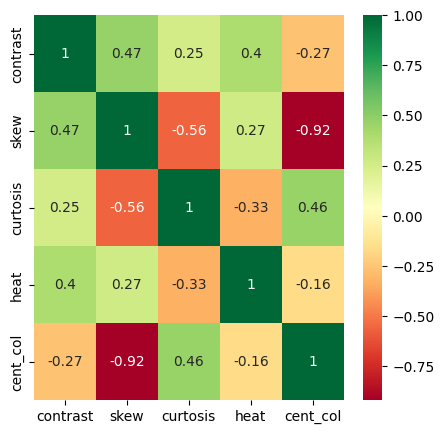

In [169]:
import seaborn as sns
df = pd.read_csv(url)
train_corr = pd.DataFrame(x_train, columns=df.columns[:-1]).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(train_corr,annot=True,cmap='RdYlGn')
plt.show()


Adjust the data according to your decision and print again the train and test for both models.

In [170]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}
cent_col_index = df.columns.get_loc('cent_col')
x_train = np.delete(x_train, cent_col_index, axis=1)
x_test = np.delete(x_test, cent_col_index, axis=1)
y_test = y_test
y_train = y_train


accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [171]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(8178, 4)


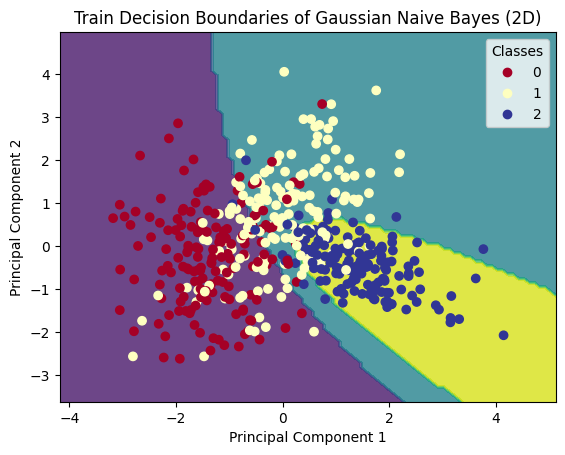

In [172]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7031, 4)


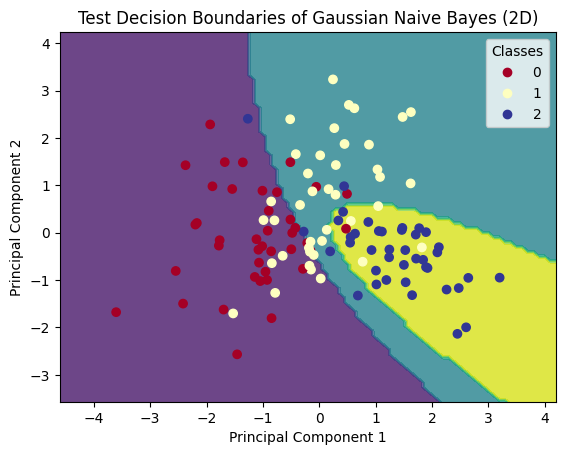

In [173]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [174]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [175]:
def readTrainData(file_name):
  df = pd.read_csv(file_name)
  texAll = []
  lbAll = []
  voc = set()
  cat = set()
  for index, row in df.iterrows():
    label = row['label']
    text = row['text']

    # Split the text into words
    words = text.split()

    texAll.append(words)

    lbAll.append(label)

    for word in words:
        voc.add(word)

    cat.add(label)

  return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [176]:

def learn_NB_text():
    class_counts = {c: 0 for c in cat}  #how many sentence there is in c  []
    word_counts = {c: {} for c in cat}  #how many "word" there is in c [][]
    total_word_counts = {c: 0 for c in cat} #number of words in c []

    for sentence, label in zip(texAll_train, lblAll_train): #fill the arrays
        class_counts[label] += 1
        for word in sentence:
            if word not in word_counts[label]:
                word_counts[label][word] = 0
            word_counts[label][word] += 1
            total_word_counts[label] += 1

    total_sentences = len(texAll_train) #calculate P(Wi)
    P = {c: class_counts[c] / total_sentences for c in cat}

    laplace = 0.5 # calculate P(x|w_i) with laplace
    V = len(voc)
    Pw = {c: {} for c in cat}
    for c in cat:
        for word in voc:
            Pw[c][word] = (word_counts[c].get(word, 0) + laplace) / (total_word_counts[c] + laplace * V)

    return Pw, P



Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [177]:

def ClassifyNB_text(Pw, P):
    success_count = 0

    for sentence, true_label in zip(texAll_test, lblAll_test):
        max_log_prob = float("-inf")
        predicted_class = None

        # log prior calsses
        for class_label, class_prob in P.items():
            log_prob_sum = math.log(class_prob)

            # Add the log probability of each word
            for word in sentence:
                if word in Pw[class_label]:
                    log_prob_sum += math.log(Pw[class_label][word])

            # get the higher sum in all classes
            if log_prob_sum > max_log_prob:
                max_log_prob = log_prob_sum
                predicted_class = class_label

        if predicted_class == true_label:
            success_count += 1

    success_rate = success_count / len(texAll_test)

    return success_rate

Read the files

In [178]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
# texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [179]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.805


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [181]:
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url)

print(df.shape)
df.head(3)

(240, 7)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [182]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Mahalanobis distance is better suited here because the features are strongly correlated according to the correlation matrix.</font>

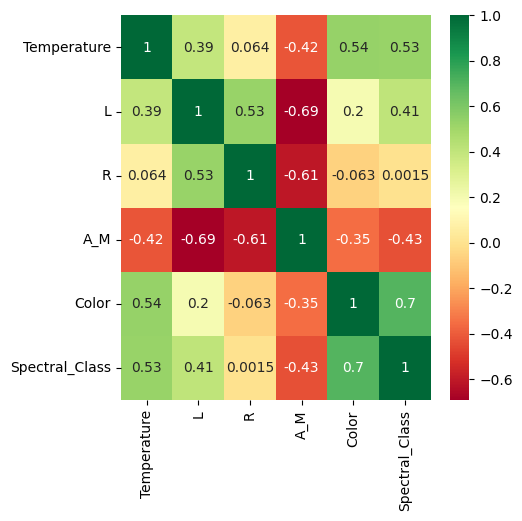

In [183]:
import seaborn as sns
train_corr = pd.DataFrame(df, columns=df.columns[:-1]).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(train_corr,annot=True,cmap='RdYlGn')
plt.show()



Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [184]:
x = df.drop('Type', axis=1)
y = df['Type']

X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

# Step 2: Split the 90% train + validation into 80% train and 20% validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)


In [185]:
print(y_train.value_counts())
print(y_validation.value_counts())
print(y_test.value_counts())


Type
5    29
1    29
0    29
2    29
4    28
3    28
Name: count, dtype: int64
Type
4    8
3    8
5    7
0    7
1    7
2    7
Name: count, dtype: int64
Type
2    4
1    4
0    4
5    4
3    4
4    4
Name: count, dtype: int64


Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [186]:
def Euclidean(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Euclidean distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.sum(diff ** 2))
  return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [187]:
def kNN_classify(data, labels, test, k, metric='Euclidian',p=5):
  arguments = (test, data)
  if(metric=='Minkowski'):
    distances = eval(f'{metric}(*arguments,p)')
  else:
    distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.
  # labels_array = labels.to_numpy()
  nearest_neighbors = np.argsort(distances, axis=1)[:, :k]
  nearest_labels = labels[nearest_neighbors]
  predicted_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=nearest_labels)
  return predicted_labels

Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>When we compare Mahalanobis and Euclidean distances for different values of k neighbors, it is seen that with increased neighbors, Mahalanobis distance remains more consistent. Euclidean distance is good at the beginning, but its ability to estimate distance decreases as the number of neighbors increases, On the other hand, the Mahalanobis distance maintains the accuracy of the results. This is an indication that Mahalanobis distance is better suited for complex data and provides more reliable values especially for those problems involving lots of neighbors to consider. Therefore, for equal accuracy, it is assumed that Mahalanobis distance would be more appropriate.</font>

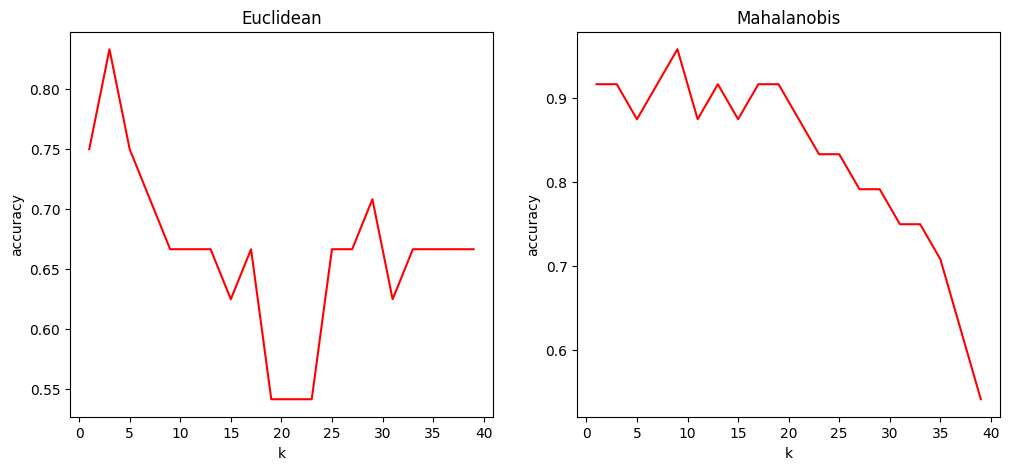

In [188]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  for k in ks:
    predictions = kNN_classify(X_train.values, y_train.values, X_test.values, k, metric)
    accs.append(np.sum(predictions == y_test) / y_test.shape[0])   # Calculate the accuracy

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)

fig.show()


Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [189]:
def Minkowski(test, data, p):
  distances = np.zeros((test.shape[0], data.shape[0]))
  for i in range(test.shape[0]):
    for j in range(data.shape[0]):
      distance = sum(abs(t - d) ** p for t, d in zip(test[i], data[j]))
      distances[i,j]=( distance ** (1 / p))

  return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

In [190]:
best_accuracy = 0
best_p = 0

# Define a range of p values
pvalues = list(range(1, 11))

# Train and evaluate models for each p value
for p in pvalues:
    # Train KNN classifier with current p value
    Knn = KNeighborsClassifier( metric='minkowski' , p=p)
    Knn.fit( X_train , y_train)

    # Evaluate accuracy on validation set
    accuracy = knn.score(X_validation, y_validation)

    # Check if current p value gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_p = p

print(best_p)


1


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>
The tuned p value usually gives better results than using Euclidean and Mahalanobis. Though sometimes Mahalanobis distance can be a bit better for certain situations, overall, the tuned p value tends to be more accurate, especially when it's at its best. So, adjusting p helps the KNN classifier make better predictions, making it a better choice for accuracy in this case.</font>

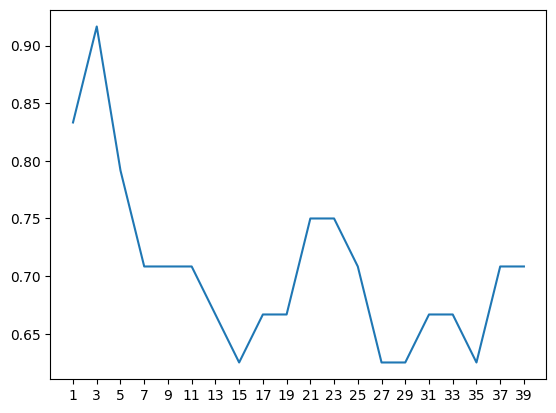

In [191]:
ks = np.arange(1, 41, 2)
accs = []
      # You may change the usage of p according to your previous implementation

for k in ks:
    c = kNN_classify(X_train.values, y_train.values, X_test.values, k, 'Minkowski',best_p)
    accs.append(np.sum(c == y_test) / y_test.shape[0])

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()



### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [192]:
train_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv"
test_url = "https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv"

# Load train data
train_df = pd.read_csv(train_url)
X_train = train_df.drop('label', axis=1).values  # Features
y_train = train_df['label'].values  # Labels

# Load test data
test_df = pd.read_csv(test_url)
X_test = test_df.drop('label', axis=1).values  # Features
y_test = test_df['label'].values  # Labels

dispaly some random image

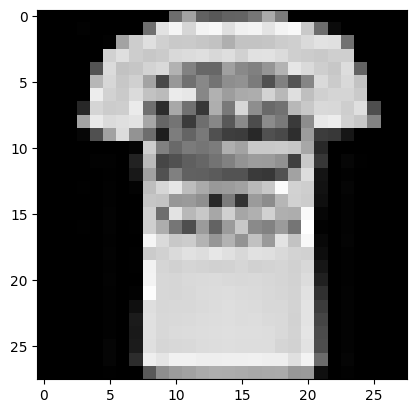

In [193]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>For image classification, we will use distance metric Euclidean distance.
<font color='red'>Because Euclidean distance measures the straight-line distance between two points in space.so it suits how images are built.

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

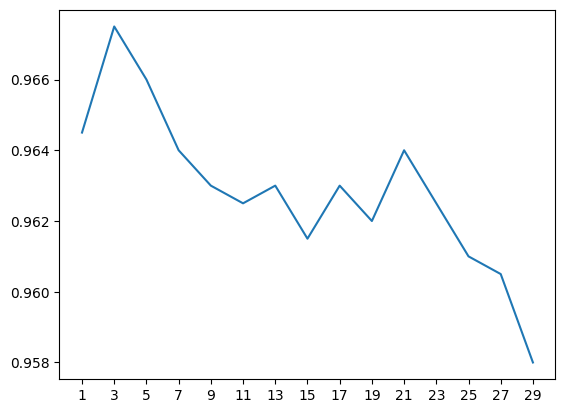

In [194]:
from sklearn.neighbors import KNeighborsClassifier
accs = []
ks = np.arange(1, 30, 2)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accs.append(accuracy)

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()

## Question 4 - Parzen Windoes
See attached PDF in Moodle